In [25]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive
from scipy.fftpack import fft, ifft,ifftshift,fftshift
from IPython.display import display, HTML
from scipy.linalg import circulant
from scipy.linalg import toeplitz, hankel
from IPython.display import clear_output


#### --------- Definition of variables ------------------------

N_size=100001 #
Gamma=0.5
Lambda=0.5

#### ------------------------------------------------------------

display(HTML("""
<style>
.output {
    display: flex;
    align-items: left;
    text-align: center;
}
</style>
"""))

def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))




def Fermi_dirac(beta,mu,n,Gamma=Gamma,Lambda=Lambda,N=N_size):
    # beta is the inverse thermic energy associated in the system (beta)
    # mu corresponds to the chemical potential
    # n is the position of the particle
    # f=np.exp(T*(Omega(Gamma,Lambda,2.0*(np.pi/N)*n)-mu)) +1
    # N corresponds to the size of the system
    f=np.exp(beta*(Omega(Gamma,Lambda,((2.*np.pi)/float(N)) * n)-mu)) +1
    return 1/f

def plot_interactive(beta,mu):
    plt.figure(figsize=(10,7))
    n=np.arange(-(N_size-1)/2,(N_size-1)/2+ 1)
    plt.subplot(2,1,1)
    plt.plot(n,Fermi_dirac(beta,mu,n))
    #plt.ylim(-0.05,1.05)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.subplot(2,1,2)
    plt.plot(n,Omega(Gamma,Lambda,(2.*np.pi)/float(N_size)*n),label=r"$\Omega$")
    plt.show()

    
def Binary_entropy(x):
    result=[]
    for i in x:
        if np.abs(i-1)<10E-10:
            result.append(0)
        else:
            result.append(-i*np.log(i)-(1-i)*np.log(1-i))
    return np.array(result)

def Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=0.40824,mu=0,Ground =False):
    if Ground:
        x=np.arange(0,(N_size-1)/2+ 1)
        m_cos=[-0.5 for i in x]
        m_sin=[-0.5 for i in x]
        
        x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

        M_minous=[((m_cos[np.abs(int(i))]-m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        M_plus = [((m_cos[np.abs(int(i))]+m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        Mminousband=np.array(M_minous)
        Mplusband=np.array(M_plus)
        #m_cos=np.array(m_cos[1:][::-1]+m_cos)
        #m_sin=np.array(m_sin[1:][::-1]+m_sin)
        #M_plus=(m_cos+m_sin)*0.5
        #M_minous=(m_cos-m_sin)*0.5
        #x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
        #Mplusband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mplusband=M_plus*np.array(Mplusband)
        #Mminousband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mminousband=M_minous*np.array(Mminousband)
        
    else:
        x=np.arange(0,(N_size-1)/2+ 1)
        m_cos=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,n=i) else 0.5 for i in x]
        m_sin=[-0.5 if np.random.random()>Fermi_dirac(beta,mu,n=i) else 0.5 for i in x]
        x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

        M_minous=[((m_cos[np.abs(int(i))]-m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        M_plus = [((m_cos[np.abs(int(i))]+m_sin[np.abs(int(i))])*0.5*np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i)))) for i in x]
        Mminousband=np.array(M_minous)
        Mplusband=np.array(M_plus)
        
        #m_cos=np.array(m_cos[1:][::-1]+m_cos)
        #m_sin=np.array(m_sin[1:][::-1]+m_sin)
        #M_plus=(m_cos+m_sin)*0.5
        #M_minous=(m_cos-m_sin)*0.5
        #x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
        #Mplusband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mplusband=M_plus*np.array(Mplusband)
        #Mminousband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
        #Mminousband=M_minous*np.array(Mminousband)
        
    x=np.arange(-(N_size-1)/2,(N_size-1)/2+ 1)
    Fourier_plus=fft(ifftshift(Mplusband))
    Fourier_minous=fft(ifftshift(Mminousband))
    return Fourier_plus,Fourier_minous
def Toeplitz_matrix(Fourier_plus,L):
    First_column=np.roll(Fourier_plus,-1)[::-1][:L]
    First_row = Fourier_plus[:L]
    return toeplitz(First_column,First_row)
def Hankel_matrix(Fourier_minous,L):
    First_column=Fourier_minous[::-1][:L]
    Last_row=np.roll(Fourier_minous,L-1)[::-1][:L]
    return hankel(First_column,Last_row)


def Covariance_matrix(L,Gamma=Gamma,Lambda=Lambda,beta=0.40824,mu=0,N_size=N_size,Ground=False):
    if Ground:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=True)
    else:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=False)
    return (Toeplitz_matrix(Fourier_plus,L)+Hankel_matrix(Fourier_minous,L))/N_size

def Covariance_matrix_from_sub_sample(Fourier_plus,Fourier_minous,L,N_size=N_size):
    return (Toeplitz_matrix(Fourier_plus,L)+Hankel_matrix(Fourier_minous,L))/N_size

In [26]:
a,b=Get_Bands_Matrix(Ground=False)

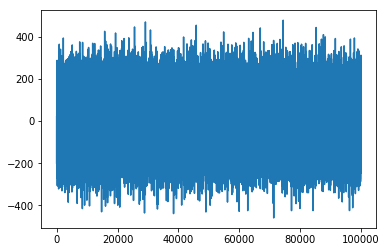

In [27]:
plt.plot(b)

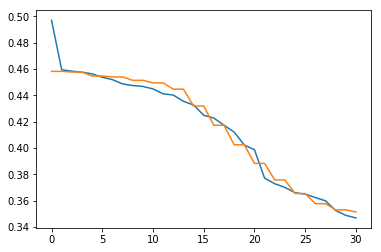

In [28]:
L=31
beta=0.40824
mu=0
#for test in range(tests):
a,b=Get_Bands_Matrix()
New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
S=np.linalg.svd(New_cov_matrix,compute_uv=False)
S=-S+0.5
plt.plot(sorted(S,reverse=True))
n=np.arange(-(L-1)/2,(L-1)/2+ 1)
to_plot=sorted(Fermi_dirac(beta,mu,n,N=L),reverse=True)
plt.plot(to_plot)

Maybe there's a mistake in doing something here but i'll try it like this and then i'll test to change it

In [29]:
tests=500
L=31
results=np.zeros((tests,2*L-1,2))
for test in range(tests):
    print("Here we are in {} test".format(test))
    a,b=Get_Bands_Matrix()
    results[test,:,0]=np.append(np.roll(a,-1)[::-1][:L][::-1].real,a[1:L].real)
    results[test,:,1]=np.append(b[::-1][:L].real,np.roll(b,L-1)[::-1][1:L].real)
    #New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
    #S=np.linalg.svd(New_cov_matrix,compute_uv=False)
    #S=-S+0.5
    #plt.plot(sorted(S,reverse=True))

Here we are in 0 test
Here we are in 1 test
Here we are in 2 test
Here we are in 3 test
Here we are in 4 test
Here we are in 5 test
Here we are in 6 test
Here we are in 7 test
Here we are in 8 test
Here we are in 9 test
Here we are in 10 test
Here we are in 11 test
Here we are in 12 test
Here we are in 13 test
Here we are in 14 test
Here we are in 15 test
Here we are in 16 test
Here we are in 17 test
Here we are in 18 test
Here we are in 19 test
Here we are in 20 test
Here we are in 21 test
Here we are in 22 test
Here we are in 23 test
Here we are in 24 test
Here we are in 25 test
Here we are in 26 test
Here we are in 27 test
Here we are in 28 test
Here we are in 29 test
Here we are in 30 test
Here we are in 31 test
Here we are in 32 test
Here we are in 33 test
Here we are in 34 test
Here we are in 35 test
Here we are in 36 test
Here we are in 37 test
Here we are in 38 test
Here we are in 39 test
Here we are in 40 test
Here we are in 41 test
Here we are in 42 test
Here we are in 43 tes

Here we are in 346 test
Here we are in 347 test
Here we are in 348 test
Here we are in 349 test
Here we are in 350 test
Here we are in 351 test
Here we are in 352 test
Here we are in 353 test
Here we are in 354 test
Here we are in 355 test
Here we are in 356 test
Here we are in 357 test
Here we are in 358 test
Here we are in 359 test
Here we are in 360 test
Here we are in 361 test
Here we are in 362 test
Here we are in 363 test
Here we are in 364 test
Here we are in 365 test
Here we are in 366 test
Here we are in 367 test
Here we are in 368 test
Here we are in 369 test
Here we are in 370 test
Here we are in 371 test
Here we are in 372 test
Here we are in 373 test
Here we are in 374 test
Here we are in 375 test
Here we are in 376 test
Here we are in 377 test
Here we are in 378 test
Here we are in 379 test
Here we are in 380 test
Here we are in 381 test
Here we are in 382 test
Here we are in 383 test
Here we are in 384 test
Here we are in 385 test
Here we are in 386 test
Here we are in 3

In [36]:
a=np.arange(51)
np.append(np.roll(a,-1)[::-1][:L][::-1].real,a[1:L].real)[:L]

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,  0])

In [30]:
F_plus=results[:,:,0]-results[:,:,0].mean(axis=0)
F_minous=results[:,:,1]-results[:,:,1].mean(axis=0)

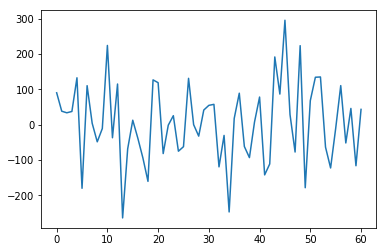

In [32]:
plt.plot(F_minous[0])

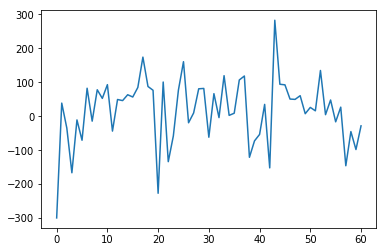

In [33]:
plt.plot(F_plus[0])

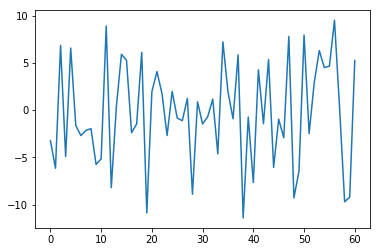

In [37]:
plt.plot(results[:,:,1].mean(axis=0))

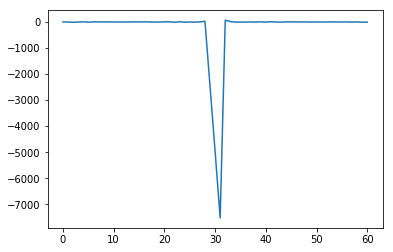

In [38]:
plt.plot(results[:,:,0].mean(axis=0))

In [ ]:
tests=50
result=[]
for L in range(101,151,2):
    print("L=",L)
    S_T=np.zeros(L)
    for test in range(tests):
        a,b=Get_Bands_Matrix()
        New_cov_matrix=Covariance_matrix_from_sub_sample(a,b,L)
        S=np.linalg.svd(New_cov_matrix,compute_uv=False)
        S=-S+0.5
        S_T+=S/tests
    result.append(S_T)